In [1]:
import torch
# from dataset import CustomDataset
import sys
import os
import random
from utils import save_checkpoint, load_checkpoint
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import config
from tqdm import tqdm
from torchvision.utils import save_image
import torchvision.transforms as T
from albumentations.pytorch import ToTensorV2
import albumentations as A

from models.cyclegan import Discriminator, Generator
from PIL import Image

In [2]:
dis_X = Discriminator().to(config.DEVICE)
dis_Y = Discriminator().to(config.DEVICE)
gen_X = Generator().to(config.DEVICE)
gen_Y = Generator().to(config.DEVICE)
opt_dis = optim.Adam(
    list(dis_X.parameters()) + list(dis_Y.parameters()),
    lr=config.LEARNING_RATE,
    betas=(0.5, 0.999),
)
opt_gen = optim.Adam(
    list(gen_X.parameters()) + list(gen_Y.parameters()),
    lr=config.LEARNING_RATE * 2,
    betas=(0.5, 0.999),
)

In [4]:
load_checkpoint("checkpoints/cycle/gen_x.pth.tar", gen_X, opt_gen, config.LEARNING_RATE * 2)
load_checkpoint("checkpoints/cycle/gen_y.pth.tar", gen_Y, opt_gen, config.LEARNING_RATE * 2)
load_checkpoint("checkpoints/cycle/dis_x.pth.tar", dis_X, opt_dis, config.LEARNING_RATE)
load_checkpoint("checkpoints/cycle/dis_y.pth.tar", dis_Y, opt_dis, config.LEARNING_RATE)

=> Loading checkpoint


RuntimeError: Error(s) in loading state_dict for Generator:
	size mismatch for initial.0.weight: copying a param with shape torch.Size([192, 192, 5, 5]) from checkpoint, the shape in current model is torch.Size([64, 3, 5, 5]).
	size mismatch for initial.0.bias: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for down.0.conv.0.weight: copying a param with shape torch.Size([192, 192, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 64, 3, 3]).
	size mismatch for down.0.conv.0.bias: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for down.1.conv.0.weight: copying a param with shape torch.Size([384, 192, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 128, 3, 3]).
	size mismatch for down.1.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.0.block.0.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.0.block.0.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.0.block.1.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.0.block.1.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.1.block.0.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.1.block.0.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.1.block.1.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.1.block.1.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.2.block.0.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.2.block.0.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.2.block.1.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.2.block.1.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.3.block.0.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.3.block.0.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.3.block.1.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.3.block.1.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.4.block.0.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.4.block.0.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.4.block.1.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.4.block.1.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.5.block.0.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.5.block.0.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.5.block.1.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.5.block.1.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.6.block.0.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.6.block.0.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.6.block.1.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.6.block.1.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.7.block.0.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.7.block.0.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.7.block.1.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.7.block.1.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.8.block.0.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.8.block.0.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for res.8.block.1.conv.0.weight: copying a param with shape torch.Size([384, 384, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for res.8.block.1.conv.0.bias: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for up.0.conv.0.weight: copying a param with shape torch.Size([384, 192, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 128, 3, 3]).
	size mismatch for up.0.conv.0.bias: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for up.1.conv.0.weight: copying a param with shape torch.Size([192, 192, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 64, 3, 3]).
	size mismatch for up.1.conv.0.bias: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for final.weight: copying a param with shape torch.Size([192, 192, 5, 5]) from checkpoint, the shape in current model is torch.Size([3, 64, 5, 5]).
	size mismatch for final.bias: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([3]).

In [4]:
t1 = T.Compose(
    [
        T.ToTensor(),
        T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
        # max_pixel_value=255),
    ]
)
t2 = T.Compose(
    [
        # T.Normalize(mean=[-1, -1, -1], std=[2, 2, 2]),
        # max_pixel_value=255),
        T.ToPILImage(),
    ]
)

In [5]:
X_path = "dataset/horse2zebra/horse2zebra/trainA/"
Y_path = "dataset/horse2zebra/horse2zebra/trainB/"

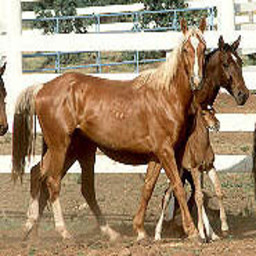

In [20]:
X = Image.open(os.path.join(X_path, random.choice(os.listdir(X_path)))).convert("RGB")
X

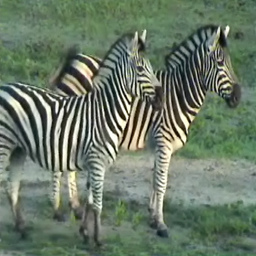

In [21]:
Y = Image.open(os.path.join(Y_path, random.choice(os.listdir(Y_path)))).convert("RGB")
Y

In [22]:
x = t1(X).unsqueeze(0).to(config.DEVICE)
y = t1(Y).unsqueeze(0).to(config.DEVICE)

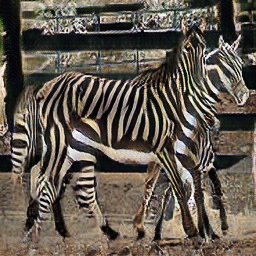

In [23]:
t2(gen_Y(x).squeeze(0).cpu() * 0.5 + 0.5)

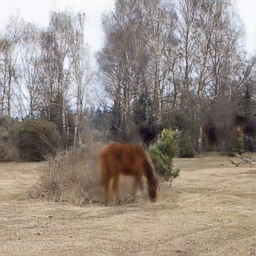

In [17]:
t2(gen_X(gen_Y(x)).squeeze(0).cpu() * 0.5 + 0.5)

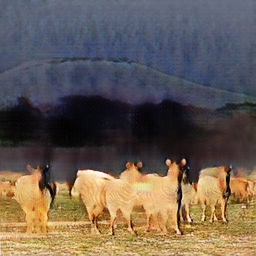

In [18]:
t2(gen_X(y).squeeze(0).cpu() * 0.5 + 0.5)

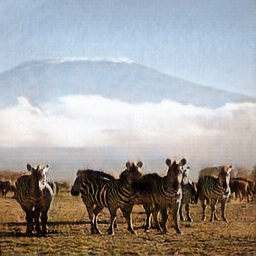

In [19]:
t2(gen_Y(gen_X(y)).squeeze(0).cpu() * 0.5 + 0.5)